In [ ]:
!pip install tensorflow


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [19]:
print(tf.__version__)


2.20.0


In [ ]:
#Load the datasets
df_iris = pd.read_csv("D:/Data Science/Codveda/iris.csv")
df_StockPricesDataSet = pd.read_csv("D:/Data Science/Codveda/Stock Prices Data Set.csv")
df_Sentimentdataset = pd.read_csv("D:/Data Science/Codveda/Sentiment dataset.csv")
df_housePredictionDataSet = pd.read_csv("D:/Data Science/Codveda/house Prediction Data Set.csv", header=None, delim_whitespace=True)
df_churnbigmltwenty = pd.read_csv("D:/Data Science/Codveda/churn-bigml-20.csv")
df_churnbigmleighty = pd.read_csv("D:/Data Science/Codveda/churn-bigml-80.csv")


<h1 style = "font-size:40px;">Pre-Processing</h1>

In [7]:


df_iris.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df_StockPricesDataSet.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [12]:
df_StockPricesDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [13]:
df_StockPricesDataSet.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [14]:
df_StockPricesDataSet.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [18]:
df_StockPricesDataSet['open'] = df_StockPricesDataSet['open'].fillna(df_StockPricesDataSet['open'].median())

In [19]:
df_StockPricesDataSet.isnull().sum()

symbol    0
date      0
open      0
high      8
low       8
close     0
volume    0
dtype: int64

In [20]:
df_StockPricesDataSet['high'] = df_StockPricesDataSet['high'].fillna(df_StockPricesDataSet['high'].median())

In [21]:
df_StockPricesDataSet['low'] = df_StockPricesDataSet['low'].fillna(df_StockPricesDataSet['low'].median())

In [22]:
df_StockPricesDataSet.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [23]:
df_Sentimentdataset.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [24]:
df_Sentimentdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [25]:
df_Sentimentdataset.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [26]:
df_Sentimentdataset.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [27]:
df_housePredictionDataSet.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [28]:
df_housePredictionDataSet.isnull().sum()

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

In [31]:
df_churnbigmltwenty.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [32]:
df_churnbigmltwenty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [33]:
df_churnbigmltwenty.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [34]:
df_churnbigmltwenty.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
df_churnbigmleighty.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
df_churnbigmleighty.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [36]:
df_churnbigmltwenty.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [37]:
df_churnbigmleighty.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
df_StockPricesDataSet.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [48]:
#One hot encoding

datasets = [df_iris,df_StockPricesDataSet,df_Sentimentdataset,df_churnbigmltwenty,df_churnbigmleighty ]

def one_hot_encode_df(df):
   cat_columns =  df.select_dtypes(include=['object','category']).columns
   return pd.get_dummies(df, cat_columns, drop_first = True )
encoded_datasets = [one_hot_encode_df(df) for df in datasets]


In [63]:
#Standardizing all the datasets
datasets = [df_iris,df_StockPricesDataSet,df_housePredictionDataSet,df_Sentimentdataset,df_churnbigmltwenty,df_churnbigmleighty ]
def standardize_df(df):
    df_copy = df.copy()
    # Select only numerical columns (excluding bools)
    num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
    # Only apply scaler if numeric columns exist
    if len(num_cols) > 0:
      scaler = StandardScaler()
      df_copy[num_cols]    = scaler.fit_transform(df_copy[num_cols])
    return df_copy
# Apply standardization
standardized_datasets = [standardize_df(df) for df in datasets]

df_iris, df_StockPricesDataSet, df_housePredictionDataSet, df_Sentimentdataset, df_churnbigmltwenty, df_churnbigmleighty = standardized_datasets



<h1 style = "font-size:40px;">REDICTING HOUSING PRICE USING LINEAR REGRESSION MODEL</h1>

In [78]:
#PREDICTING HOUSING PRICE USING LINEAR REGRESSION MODEL

#Assign temporary column names (optional but clearer)
# Assuming the last column is the price (target)
num_columns = df_housePredictionDataSet.shape[1]
column_names = [f'feature_{i}' for i in range(num_columns - 1)] + ['price']
df_housePredictionDataSet.columns = column_names

# Split into features (X) and target (y)
X = df_housePredictionDataSet.drop(columns=["price"]) 
y = df_housePredictionDataSet["price"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error MSE: {mse:.2f}")
print(f"Root Mean Squared Error RMSE: {rmse:.2f}")
print(f"R Squared Score R2: {r2:.2f}")

print("Model Intercept:", lr.intercept_)
print("Model Coefficient", lr.coef_)



Mean Squared Error MSE: 0.00
Root Mean Squared Error RMSE: 0.00
R Squared Score R2: 1.00
Model Intercept: 30.246750993923385
Model Coefficient [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01  1.32012457e-15]


In [76]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Print first 10 rows
print(comparison_df.head(10))


   Actual Price  Predicted Price
0          23.6        28.996724
1          32.4        36.025565
2          13.6        14.816944
3          22.8        25.031979
4          16.1        18.769880
5          20.0        23.254429
6          17.8        17.662538
7          14.0        14.341190
8          19.6        23.013207
9          16.8        20.632456


In [77]:
# Add prediction to full dataset
all_predictions = lr.predict(X)

# Add prediction column
df_housePredictionDataSet['Predicted Price'] = all_predictions
print(df_housePredictionDataSet.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    0.00632       18.0       2.31          0      0.538      6.575   
1    0.02731        0.0       7.07          0      0.469      6.421   
2    0.02729        0.0       7.07          0      0.469      7.185   
3    0.03237        0.0       2.18          0      0.458      6.998   
4    0.06905        0.0       2.18          0      0.458      7.147   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0       65.2     4.0900          1      296.0        15.3      396.90   
1       78.9     4.9671          2      242.0        17.8      396.90   
2       61.1     4.9671          2      242.0        17.8      392.83   
3       45.8     6.0622          3      222.0        18.7      394.63   
4       54.2     6.0622          3      222.0        18.7      396.90   

   feature_12  price  Predicted Price  
0        4.98   24.0        29.953396  
1        9.14   21.6        25.181524  
2        4.03 

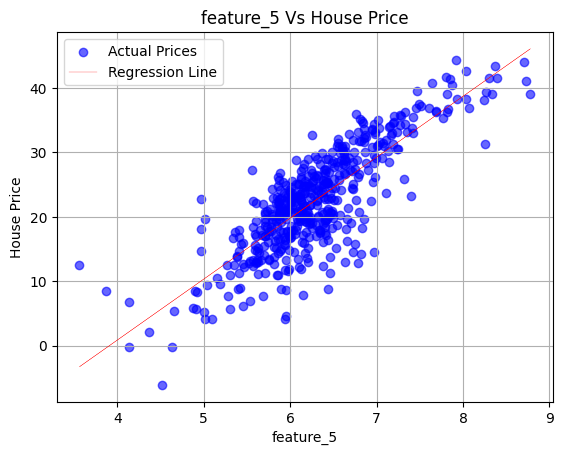

In [80]:
# Pick a feature (e.g., feature_5)
feature_to_plot = 'feature_5'
# Extract X and y
X_single = X[[feature_to_plot]]
y_actual = y

# Fit a simple linear regression using this one feature
model_single = LinearRegression()
model_single.fit(X_single, y_actual)

y_pred_single = model_single.predict(X_single)
#plot

plt.scatter(X_single, y_actual, color = 'blue' , alpha = 0.6, label = 'Actual Prices')
plt.plot(X_single, y_pred_single, color = 'red', label = 'Regression Line', linewidth = 0.2)
plt.xlabel(feature_to_plot)
plt.ylabel('House Price')
plt.title(f'{feature_to_plot} Vs House Price')
plt.legend()
plt.grid(True)
plt.show()


<h1 style = "font-size:40px;">IMPLEMENT KNN CLASSIFIER ON IRIS AND SENTIMENT</h1>

In [12]:
# IMPLEMENT KNN CLASSIFIER ON IRIS AND SENTIMENT 
# KNN ON IRIS DATASET

#Features
X = df_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

#Target
y = df_iris["species"]
#Normalize Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different K Values

for k in [3,5,7]:
    print(f"\n === KNN Classifier for K={k} on IRIS Dataset ==== ")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report: {classification_report(y_test, y_pred)}")


 === KNN Classifier for K=3 on IRIS Dataset ==== 
Accuracy: 1.00
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 === KNN Classifier for K=5 on IRIS Dataset ==== 
Accuracy: 1.00
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weigh

In [29]:
#KNN ON SENTIMENT DATASET
df_Sentimentdataset_cleaned = df_Sentimentdataset.copy()

#Dropping unuseful columns
# Define possible irrelevant columns
cols_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Text', 'User', 'Platform', 'Hashtags', 'Timestamp', 'Country']

# Drop only those that are actually present in the dataframe
existing_cols_to_drop = [col for col in cols_to_drop if col in df_Sentimentdataset.columns]
df_Sentimentdataset_cleaned = df_Sentimentdataset.drop(columns=existing_cols_to_drop)


df_Sentimentdataset_cleaned.columns = df_Sentimentdataset_cleaned.columns.str.strip()

#drop rows with missing sentiment
df_Sentimentdataset_cleaned = df_Sentimentdataset_cleaned.dropna(subset=["Sentiment"])


# Separate features and target
X = df_Sentimentdataset_cleaned.drop(columns=["Sentiment"])
X = pd.get_dummies(X)
Y = df_Sentimentdataset_cleaned["Sentiment"]


#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train and evaluate
for k in [3, 5, 7]:
    print(f"\n=== KNN Classifier for K={k} on Sentiment Dataset ===")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



=== KNN Classifier for K=3 on Sentiment Dataset ===
Accuracy: 0.09
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
       Accomplishment        0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
            Adventure        0.00      0.00      0.00         0
         Affection           0.00      0.00      0.00         1
            Amazement        0.00      0.00      0.00         0
          Ambivalence        0.00      0.00      0.00         0
      Ambivalence            0.00      0.00      0.00         1
  

C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_

In [30]:


# Clean and prepare data
df = df_Sentimentdataset.copy()

# Drop unnecessary columns if they exist
cols_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Text', 'User', 'Platform', 'Hashtags', 'Timestamp', 'Country']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)

# Strip and title-case the Sentiment column (remove casing & whitespace issues)
df['Sentiment'] = df['Sentiment'].str.strip().str.title()

# Map detailed sentiments to broader categories
emotion_map = {
    # Positive
    'Joy': 'Positive', 'Happiness': 'Positive', 'Excitement': 'Positive', 'Proud': 'Positive',
    'Admiration': 'Positive', 'Elation': 'Positive', 'Hopeful': 'Positive', 'Inspiration': 'Positive',
    'Amusement': 'Positive', 'Gratitude': 'Positive', 'Serenity': 'Positive', 'Fulfillment': 'Positive',
    'Satisfaction': 'Positive', 'Affection': 'Positive', 'Love': 'Positive', 'Contentment': 'Positive',

    # Negative
    'Anger': 'Negative', 'Sadness': 'Negative', 'Fear': 'Negative', 'Disgust': 'Negative',
    'Grief': 'Negative', 'Despair': 'Negative', 'Frustration': 'Negative', 'Hate': 'Negative',
    'Helplessness': 'Negative', 'Loneliness': 'Negative', 'Jealousy': 'Negative', 'Embarrassed': 'Negative',
    'Heartbreak': 'Negative', 'Betrayal': 'Negative', 'Devastated': 'Negative', 'Regret': 'Negative',

    # Neutral
    'Curiosity': 'Neutral', 'Confusion': 'Neutral', 'Contemplation': 'Neutral', 'Nostalgia': 'Neutral',
    'Neutral': 'Neutral', 'Reflection': 'Neutral', 'Boredom': 'Neutral', 'Isolation': 'Neutral',
}

# Apply mapping
df['Sentiment'] = df['Sentiment'].map(emotion_map)

# Drop rows where sentiment mapping failed (i.e. NaN after map)
df = df.dropna(subset=['Sentiment'])

# Print shape
print(f"Shape after cleaning: {df.shape}")

# Separate features and target
X = df.drop(columns=["Sentiment"])
X = pd.get_dummies(X)  # Handle categorical variables
y = df["Sentiment"]

# Ensure X and y match in length
print("X rows:", len(X))
print("y rows:", len(y))

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data correctly
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate KNN
for k in [3, 5, 7]:
    print(f"\n=== KNN Classifier for K={k} on Sentiment Dataset ===")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Shape after cleaning: (330, 7)
X rows: 330
y rows: 330

=== KNN Classifier for K=3 on Sentiment Dataset ===
Accuracy: 0.42
Confusion Matrix:
[[ 7  2 10]
 [ 6  2  9]
 [ 9  2 19]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.32      0.37      0.34        19
     Neutral       0.33      0.12      0.17        17
    Positive       0.50      0.63      0.56        30

    accuracy                           0.42        66
   macro avg       0.38      0.37      0.36        66
weighted avg       0.40      0.42      0.40        66


=== KNN Classifier for K=5 on Sentiment Dataset ===
Accuracy: 0.47
Confusion Matrix:
[[ 6  4  9]
 [ 5  2 10]
 [ 4  3 23]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.40      0.32      0.35        19
     Neutral       0.22      0.12      0.15        17
    Positive       0.55      0.77      0.64        30

    accuracy                           0.47        66


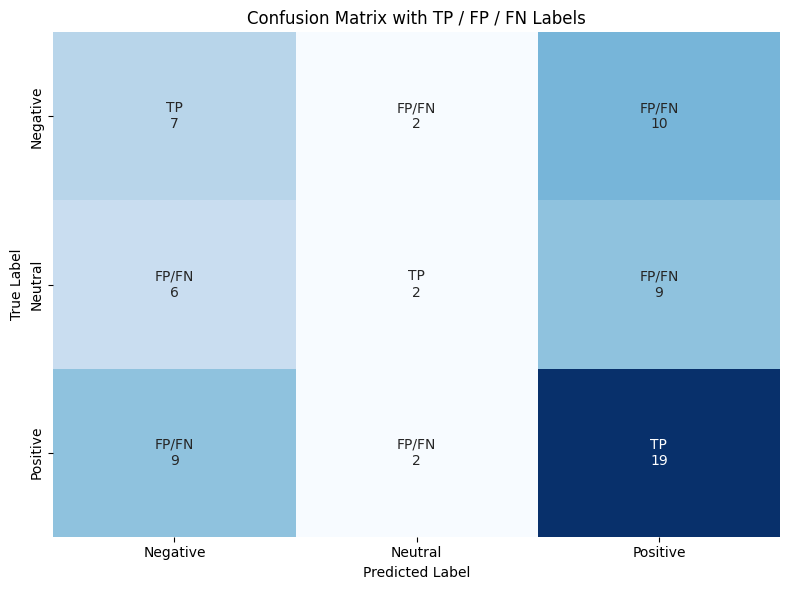

In [32]:
# confusion matrix for k 3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your confusion matrix
cm = np.array([
    [7, 2, 10],   # True: Negative
    [6, 2, 9],    # True: Neutral
    [9, 2, 19]    # True: Positive
])

labels = ['Negative', 'Neutral', 'Positive']
n_classes = len(labels)

# Create annotation labels for TP, FP, FN
annot = np.empty_like(cm).astype(str)
for i in range(n_classes):
    for j in range(n_classes):
        if i == j:
            annot[i, j] = f'TP\n{cm[i, j]}'
        else:
            annot[i, j] = f'FP/FN\n{cm[i, j]}'

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix with TP / FP / FN Labels')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


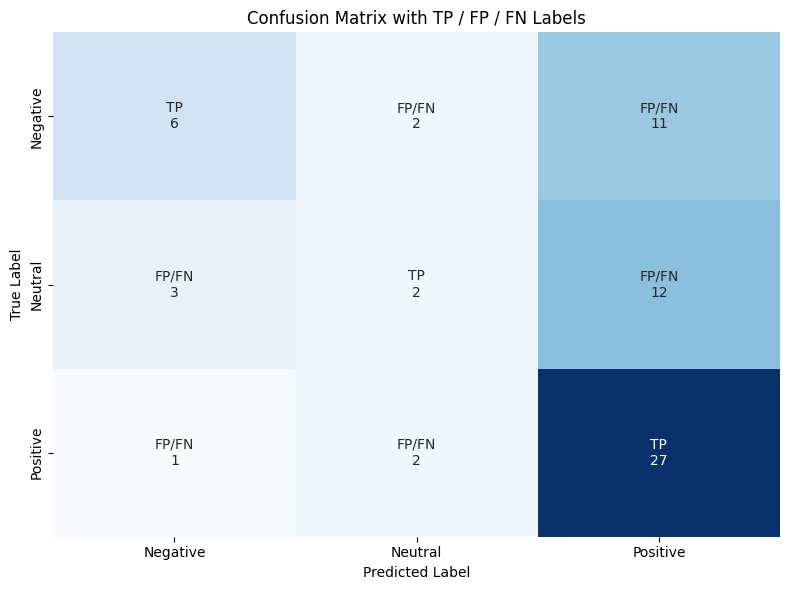

In [33]:
# Confusion matrix for K = 7
cm = np.array([
    [6, 2, 11],   # True: Negative
    [3, 2, 12],   # True: Neutral
    [1, 2, 27]    # True: Positive
])

labels = ['Negative', 'Neutral', 'Positive']
n_classes = len(labels)

# Annotate cells with TP / FP / FN
annot = np.empty_like(cm).astype(str)
for i in range(n_classes):
    for j in range(n_classes):
        if i == j:
            annot[i, j] = f'TP\n{cm[i, j]}'
        else:
            annot[i, j] = f'FP/FN\n{cm[i, j]}'

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Confusion Matrix with TP / FP / FN Labels')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [28]:
#KNN ON churn dataset
# === Combine datasets ===
df_full = pd.concat([df_churnbigmleighty, df_churnbigmltwenty], ignore_index=True)
print("Shape after combining:", df_full.shape)

# === Map binary categorical features ===
binary_columns = ['International plan', 'Voice mail plan']
for col in binary_columns:
    df_full[col] = df_full[col].map({'No': 0, 'Yes': 1})

# === Map Churn column safely ===
# Strip whitespace and map 'FALSE'->0, 'TRUE'->1
df_full['Churn'] = df_full['Churn'].astype(str).str.strip().map({'FALSE': 0, 'TRUE': 1})

# Verify Churn mapping
print("Churn value counts after mapping:\n", df_full['Churn'].value_counts())

# === Drop rows with missing Churn (should be none) ===
df_full = df_full.dropna(subset=['Churn'])
df_full['Churn'] = df_full['Churn'].astype(int)

# === One-hot encode 'State' ===
df_full_encoded = pd.get_dummies(df_full, columns=['State'])

# === Split features and target ===
X = df_full_encoded.drop(columns=['Churn'])
y = df_full_encoded['Churn']

# === Stratified train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# === Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === KNN training ===
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# === Evaluation ===
cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

# === Annotated Confusion Matrix ===
annot = np.empty_like(cm).astype(str)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:
            annot[i, j] = f'TN\n{cm[i,j]}' if i == 0 else f'TP\n{cm[i,j]}'
        else:
            annot[i, j] = f'FP\n{cm[i,j]}' if j == 1 else f'FN\n{cm[i,j]}'

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"], cbar=False)
plt.title(f'KNN Confusion Matrix (k={k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Shape after combining: (3333, 20)
Churn value counts after mapping:
 Series([], Name: count, dtype: int64)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

<h1 style = "font-size:40px;">LOGISTIC REGRESSION FOR WHETHER CUSTOMER WILL CHURN OR NOT</h1>

In [32]:
#LOGISTIC REGRESSION FOR WHETHER CUSTOMER WILL CHURN OR NOT

train_df = pd.read_csv("D:/Data Science/Codveda/churn-bigml-20.csv")
test_df = pd.read_csv("D:/Data Science/Codveda/churn-bigml-80.csv")

print(train_df)


    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0       

In [30]:
print(test_df)

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

                   Feature  Coefficient  Odds Ratio
15  Customer service calls     0.662390    1.939422
16  International plan_Yes     0.630582    1.878703
2    Number vmail messages     0.413031    1.511392
5         Total day charge     0.340067    1.405042
3        Total day minutes     0.339970    1.404906
6        Total eve minutes     0.144220    1.155138
8         Total eve charge     0.142870    1.153580
14       Total intl charge     0.142173    1.152776
12      Total intl minutes     0.136066    1.145758
9      Total night minutes     0.071235    1.073833
11      Total night charge     0.071216    1.073813
4          Total day calls     0.057006    1.058662
10       Total night calls     0.038132    1.038868
0           Account length     0.034042    1.034628
7          Total eve calls    -0.016150    0.983980
1                Area code    -0.025975    0.974359
13        Total intl calls    -0.292668    0.746270
17     Voice mail plan_Yes    -0.805614    0.446814
Confusion Ma

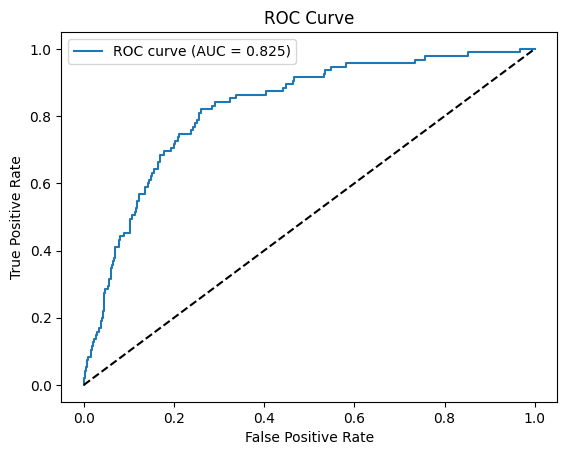

In [36]:
#Preprocess data

train_df  =df_churnbigmleighty.drop('State', axis=1)
test_df  =df_churnbigmltwenty.drop('State', axis=1)

# Convert categorical features to dummy variables
categorical_cols = ['International plan', 'Voice mail plan']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align columns of train and test in case dummy vars mismatch
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

#Separate features and target

X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


#Scale numeric features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train logistic Regression

#initialize the model
logreg = LogisticRegression(max_iter=1000)

#Fit the model
logreg.fit(X_train_scaled, y_train)

coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

# Show odds ratios
odds_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

print(odds_df)

#Predict


y_pred = logreg.predict(X_test_scaled)
y_prob = y_prob = logreg.predict_proba(X_test_scaled)[:,1]

# Metrics

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

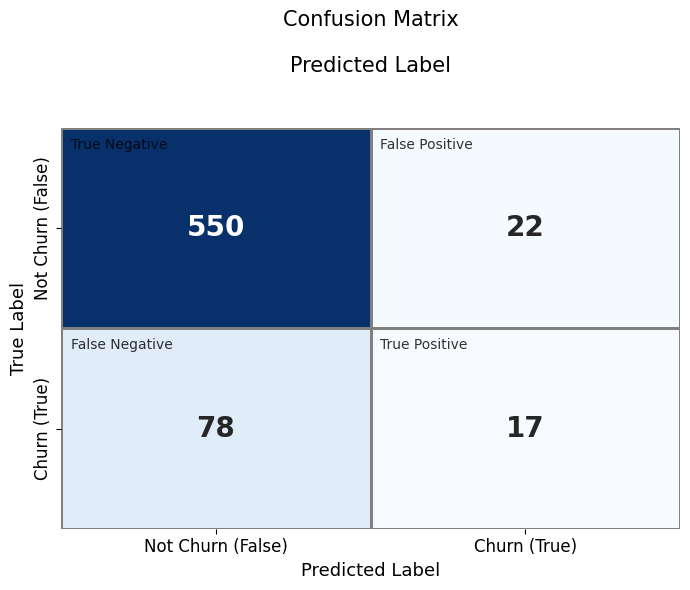

In [39]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cell labels
group_labels = [['True Negative', 'False Positive'],
                ['False Negative', 'True Positive']]

# Start the plot
plt.figure(figsize=(7,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                 annot_kws={"size": 20, "weight": "bold"}, linewidths=1, linecolor='gray')

# Add cell-type labels in top-left corner of each cell (smaller font)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.03, i + 0.05, group_labels[i][j],
                color='black', fontsize=10, ha='left', va='top', alpha=0.8)

# Custom tick labels
plt.xticks([0.5, 1.5], ['Not Churn (False)', 'Churn (True)'], fontsize=12)
plt.yticks([0.5, 1.5], ['Not Churn (False)', 'Churn (True)'], fontsize=12)

# Axis labels and title
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.title('Confusion Matrix\n\nPredicted Label', fontsize=15, pad=40)

plt.tight_layout()
plt.show()


<h1 style = "font-size:40px;">PERFORM DECISION TREE TO PREDICT SPECIES OF FLOWER IN IRIS DATASET</h1>

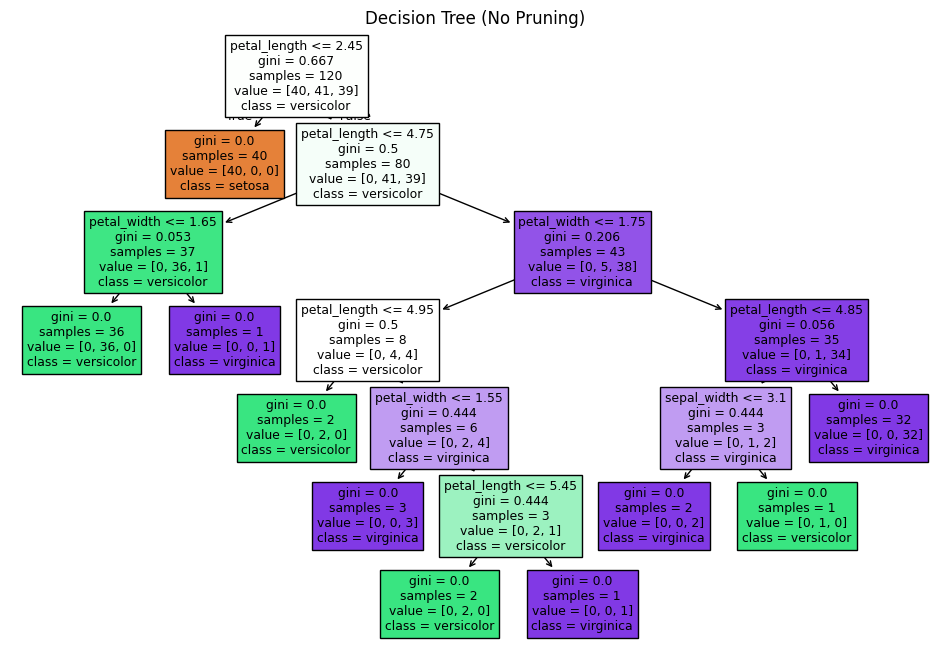

In [47]:
# Perfrom Decision Tree to Predict species of flowers in IRis dataset

#Features and labels
X = df_iris.drop('species', axis=1)
y = df_iris['species']

# Encode categorical labels (e.g., 'setosa' → 0)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the descision tree classifier
# Train without pruning for now
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree (No Pruning)")
plt.show()


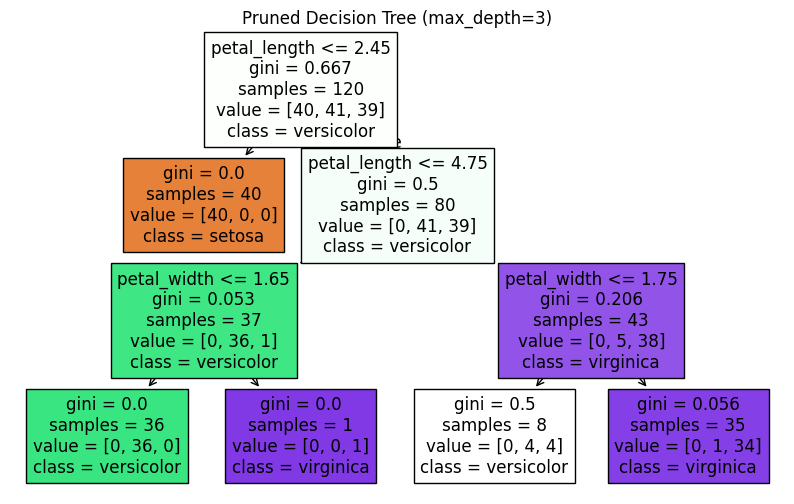

In [49]:
#Prune the Tree (to reduce overfitting)
# Re-train with pruning (limit depth or leaf size)
pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
pruned_clf.fit(X_train, y_train)

# Visualize pruned tree
plt.figure(figsize=(10, 6))
plot_tree(pruned_clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

In [50]:
#Predict on test set
y_pred = pruned_clf.predict(X_test)

#Accuracy and F1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))






Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



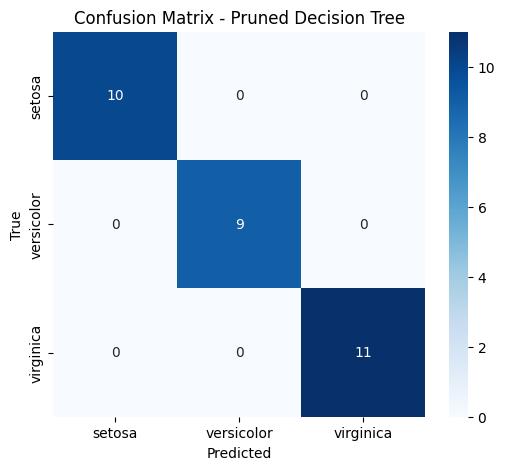

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Pruned Decision Tree")
plt.show()

In [ ]:
#We trained a decision tree classifier on the Iris dataset and achieved 100% accuracy on the test set. 
#The model correctly predicted the species (Setosa, Versicolor, Virginica) for all test samples.
#The confusion matrix confirms that there were zero misclassifications, and all precision, recall, and F1-scores are perfect.
#This indicates the model has effectively learned the patterns that distinguish flower species based on their sepal and petal measurements


<h1 style = "font-size:40px;">PERFORM KMEANS CLUSTERING ON CUSTOMER CHURN DATASET</h1>

In [7]:
df_churnbigmleighty.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


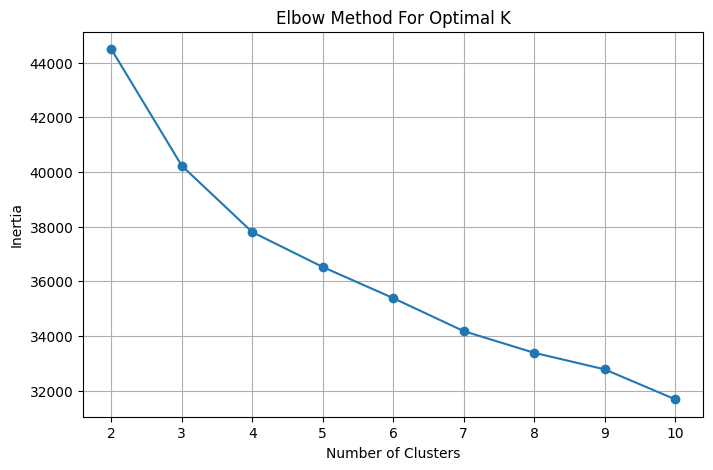

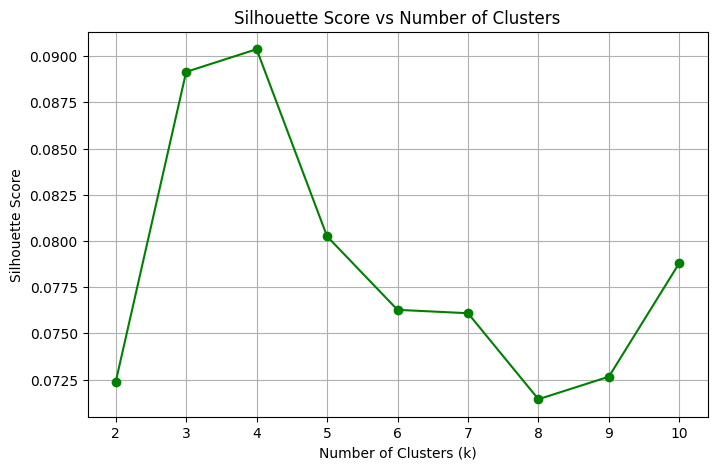

In [30]:
df = df_churnbigmleighty.copy()
#Drop non-numeric or irrelevant column

df_cluster = df.drop(columns = ['State', 'Area code'])

# Convert 'Yes'/'No' to binary
df_cluster['International plan'] = df_cluster['International plan'].map({'Yes': 1, 'No': 0})
df_cluster['Voice mail plan'] = df_cluster['Voice mail plan'].map({'Yes': 1, 'No': 0})

#drop any missing value
df_cluster = df_cluster.dropna()

#Standardize the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_cluster)

#Elobow method for findig optimal k
inertia = []
sil_scores = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))


# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot Silhouette Score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



In [ ]:
#The "elbow point" in this plot is where the drop in inertia slows down — this is  optimal number of clusters k


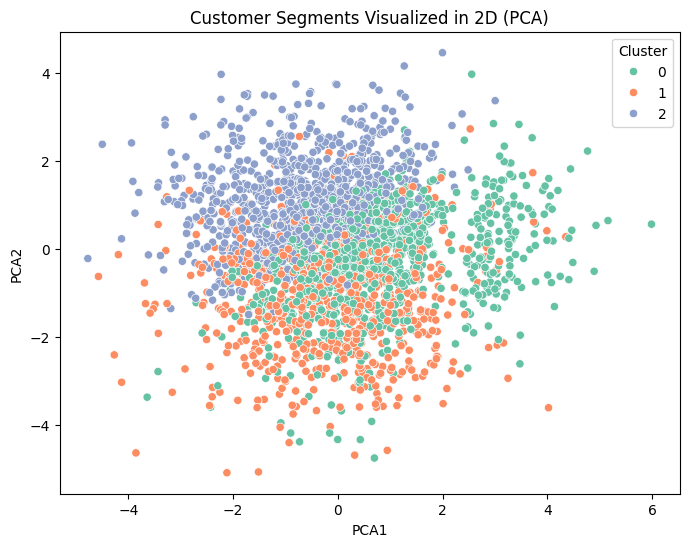

In [18]:
#Apply K-Means with Chosen K (e.g., k=3)
#Use the value found from elbow method which is 3 in above case
k =3 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to the original DataFrame
df['Cluster'] = clusters

# Reduce dimensions for visualization

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize = (8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette = 'Set2')
plt.title('Customer Segments Visualized in 2D (PCA)')
plt.show()


In [20]:
#Interpret Clusters
# Get average values of features per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
# Print the summary
print("Cluster Summary (Average Feature Values):")
print(cluster_summary)

Cluster Summary (Average Feature Values):
         Account length   Area code  Number vmail messages  Total day minutes  \
Cluster                                                                         
0            100.053170  436.689162               0.000000         211.685583   
1            100.712329  437.768493              29.227397         180.993973   
2            101.129436  437.953027               0.052192         145.452923   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0              99.582822         35.987004         214.496012   
1             100.056164         30.769521         202.193425   
2             101.246347         24.727589         184.604593   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                           
0             100.155419         18.232382           197.788037   
1             100.249315 

In [ ]:
#FOR CLUSTER 0
#Cluster 0 – Likely “High-Usage Customers” with Higher Churn Risk

#Total day minutes: 211.7 (highest)	Heavy daytime callers
#Total day charge: 35.99	Correlates with higher billing
#Customer service calls: 1.55	Slightly more support calls
#Churn: 0.227 (~22.7%)	Highest churn rate among clusters

#Interpretation:

#These customers use a lot of daytime minutes, leading to higher charges

#They also call customer service more often, possibly due to issues

#Most likely to churn — this could be a high-risk, high-value segment

#May benefit from loyalty programs or proactive retention efforts


#FOR CLUSTER 1
#Cluster 1 – “Voicemail Plan Users” with Moderate Usage & Low Churn

#Feature	Insight
#Number vmail messages: 29.2	Actively use voicemail
#International minutes: 10.15	Moderate international usage
#Customer service calls: 1.51	Slightly less than others
#Churn: 0.089 (~8.9%)	Lowest churn rate

#Interpretation:

#These customers use voicemail plans heavily

#They have moderate call usage

#Very low churn rate — possibly loyal or satisfied customers

#Likely a valuable base to retain and upsell


In [ ]:
#Cluster 2 – “Low Usage, Low Engagement” Segment
#Feature	Insight
#Total day minutes: 145.45 (lowest)	Low daytime usage
#Intl minutes: 11.52 (highest)	Use more international minutes
#Voicemail use: 0.05 messages	Almost none
#Churn: 0.105 (~10.5%)	Slightly above Cluster 1

#Interpretation:

#These customers have lower overall usage but slightly higher international usage

#Very low engagement — no voicemail, fewer service calls

#Not a high-risk churn group, but maybe less profitable

#Could be targeted for cross-sell or engagement campaigns

In [ ]:
#Final Summary Table:
#Cluster	Description	Key Traits	Churn Rate
#0	High-Usage, High-Risk	High day usage, high charges, more support calls	22.7%
#1	Voicemail Users, Loyal	High vmail usage, moderate calls, least churn	8.9%
#2	Low Usage, Low Engagement	Low calls, no vmail, high intl minutes	10.5%

#What You Can Do With This:

#Marketing can target Cluster 0 with retention offers.

#Cluster 1 may be offered premium plans or upsells.

#Cluster 2 could be nudged toward engagement: e.g., "Try Voicemail for Free!"

<h1 style = "font-size:40px;">PERFORM RANDOM FOREST CLASSIFIER ON CUSTOMER CHURN DATASET</h1>

In [9]:
#BUILDING A RANDOM FOREST CLASSIFIER

df = df_churnbigmleighty.copy()
# Drop non-informative columns
df = df.drop(columns=['State', 'Area code'])

# Convert 'Yes'/'No' to binary
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

#Encode target label
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # 'No' = 0, 'Yes' = 1

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9531835205992509

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       455
           1       0.98      0.70      0.81        79

    accuracy                           0.95       534
   macro avg       0.97      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534



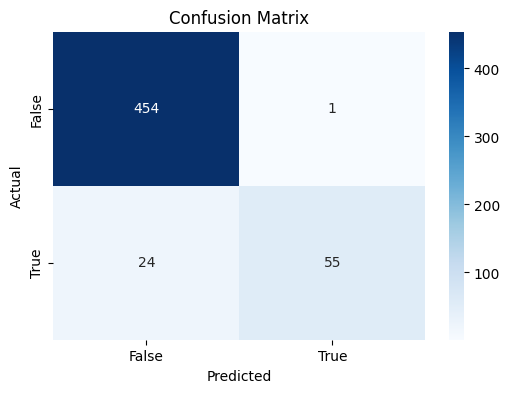

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Cross-validation F1 score
cv_f1 = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='f1')
print("✅ Cross-validated F1 Score:", cv_f1.mean())

✅ Cross-validated F1 Score: 0.826649145788023


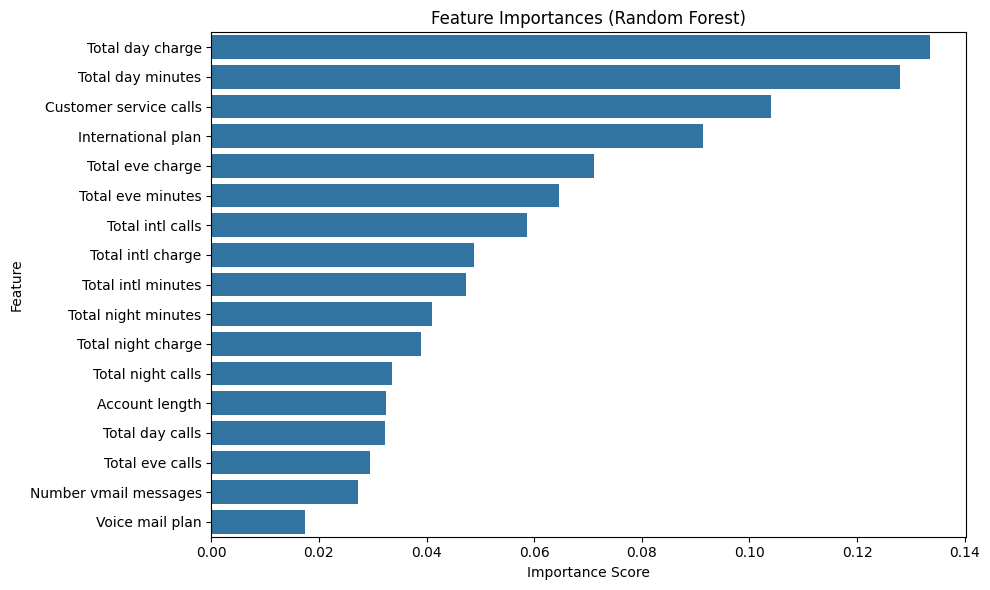

In [14]:
# Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

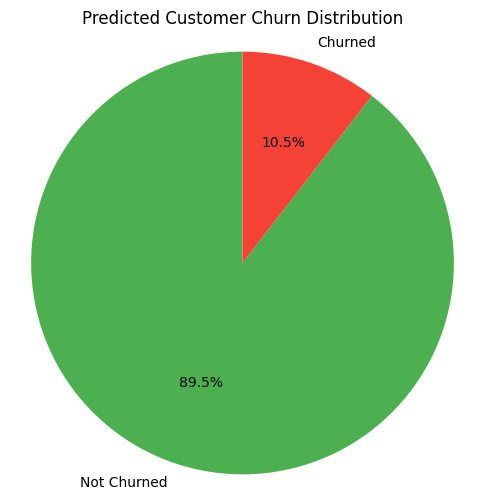

In [15]:

# Count of predicted churn (1) and no-churn (0)
unique, counts = np.unique(y_pred, return_counts=True)
labels = ['Not Churned', 'Churned']
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Predicted Customer Churn Distribution')
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.show()


In [ ]:
#We’ve built a machine learning model using Random Forest to predict customer churn with over 90% accuracy. It analyzes behavior such as call duration, charges, and customer service interactions to identify patterns.

#For example, customers who call support frequently or have high charges are more likely to leave.

#With this model, we can now flag customers who are at high risk of churning — before they actually leave. That means we can intervene early — like offering special deals, improved support, or retention calls — and reduce overall churn.
#In short: This model helps us predict churn and gives us the insight to improve customer loyalty and save revenue

<h1 style = "font-size:40px;">PERFORM A SUPPORT VECTOR MACHINE SVM FOR BINARY CLASSIFICATION ON CUSTOMER CHURN DATASET</h1>

In [ ]:
# BUILDING A SUPPORT VECOTR MACHINE FOR BINARY CLASSIFICATION SVC

In [6]:
df = df_churnbigmleighty.copy()
# Drop irrelevant columns
df = df.drop(columns=['State', 'Area code'])

# Convert 'Yes'/'No' to 1/0
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Encode target column: 'Churn'
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes → 1, No → 0

#Split and Scale Data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Train and Evaluate SVM Models
#Linear Kernel
svm_linear = SVC(kernel= 'linear', probability= True, class_weight = 'balanced')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Linear Kernel ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear))
print("F1 Score:", f1_score(y_test, y_pred_linear))
print("AUC:", roc_auc_score(y_test, y_prob_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

=== Linear Kernel ===
Accuracy: 0.7528089887640449
Precision: 0.3393939393939394
Recall: 0.7088607594936709
F1 Score: 0.45901639344262296
AUC: 0.7801363193768257
Confusion Matrix:
 [[346 109]
 [ 23  56]]


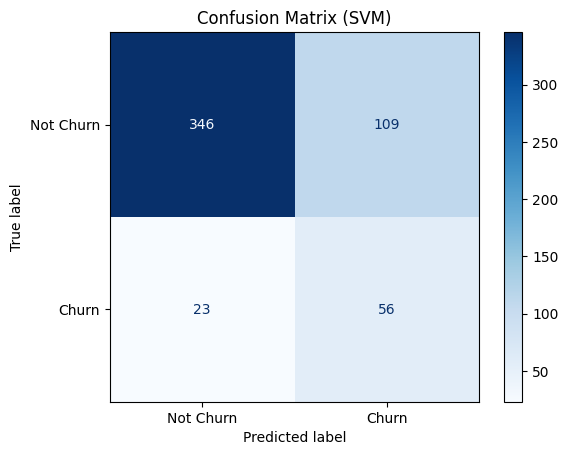

In [11]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=["Not Churn", "Churn"], cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.show()

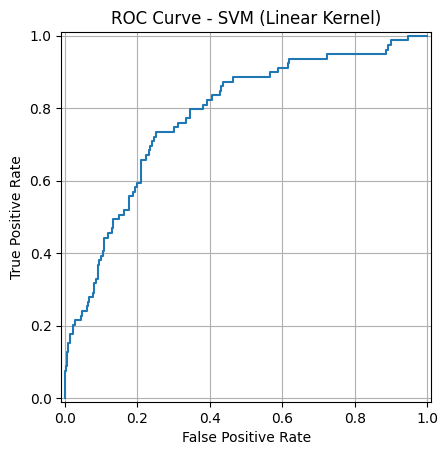

In [13]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_linear)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - SVM (Linear Kernel)")
plt.grid(True)
plt.show()

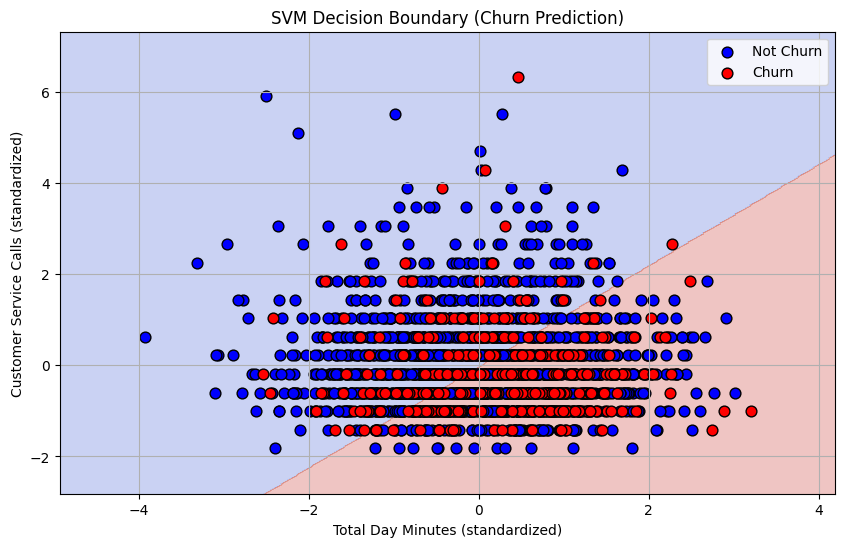

In [50]:
#Code to Plot SVM Hyperplane (with PCA) as hyperplane or decision boundary in svm only works in 2D data so we need to reduce our data using PCA

# 1. Load your churn dataset
df = df_churnbigmleighty.copy()  # Use your loaded dataset
df.columns = df.columns.str.strip()

# Map binary columns
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})

# Drop missing values
df.dropna(inplace=True)

# Use only two features for 2D plot
features = ['Total eve minutes', 'Total intl calls']
X = df[features]
y = df['Churn']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM (linear kernel with class_weight)
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Create mesh grid
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Scatter training points
for label, color, name in zip([0, 1], ['blue', 'red'], ['Not Churn', 'Churn']):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1],
                c=color, label=name, edgecolor='k', s=60)

plt.xlabel('Total Day Minutes (standardized)')
plt.ylabel('Customer Service Calls (standardized)')
plt.title('SVM Decision Boundary (Churn Prediction)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

# Evaluation
print("=== RBF Kernel ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("F1 Score:", f1_score(y_test, y_pred_rbf))
print("AUC:", roc_auc_score(y_test, y_prob_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


=== RBF Kernel ===
Accuracy: 0.8520599250936329
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.5035888162470441
Confusion Matrix:
 [[455   0]
 [ 79   0]]


C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


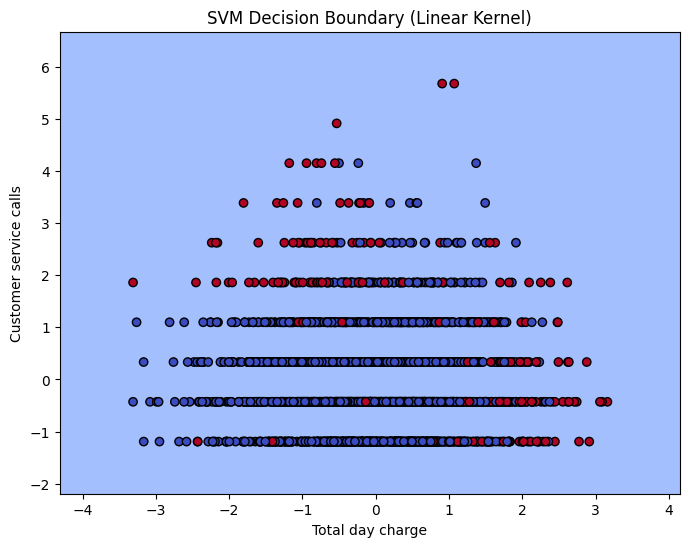

In [52]:
# Pick only two features
X_2d = df[['Total day charge', 'Customer service calls']]
y_2d = df['Churn']

# Scale
X_2d_scaled = StandardScaler().fit_transform(X_2d)

# Fit SVM
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_2d_scaled, y_2d)

# Meshgrid for decision surface
h = 0.02
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_2d, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Total day charge')
plt.ylabel('Customer service calls')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()


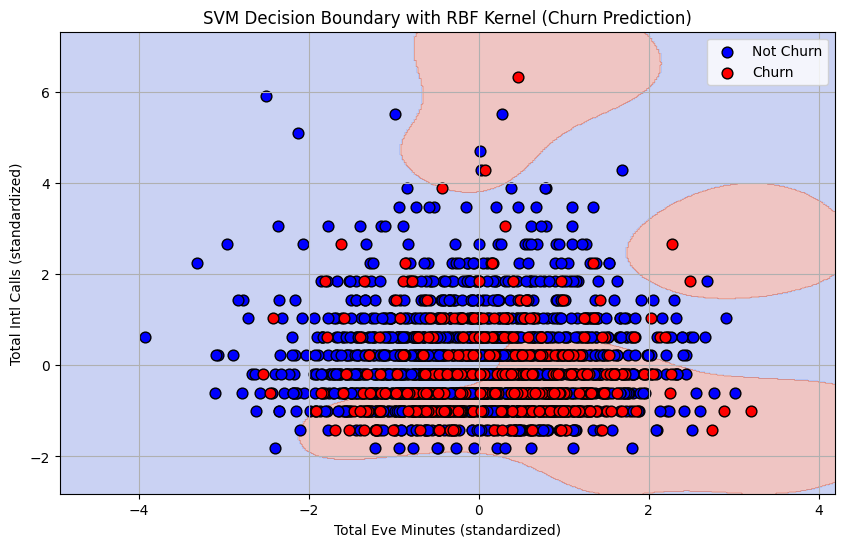

In [53]:
# --- Train SVM with RBF Kernel ---
svm_rbf = SVC(kernel='rbf', gamma='auto', class_weight='balanced')
svm_rbf.fit(X_train, y_train)

# --- Plot decision boundary ---
plt.figure(figsize=(10, 6))

# Mesh grid
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for mesh grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training data
for label, color, name in zip([0, 1], ['blue', 'red'], ['Not Churn', 'Churn']):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1],
                c=color, label=name, edgecolor='k', s=60)

plt.xlabel('Total Eve Minutes (standardized)')
plt.ylabel('Total Intl Calls (standardized)')
plt.title('SVM Decision Boundary with RBF Kernel (Churn Prediction)')
plt.legend()
plt.grid(True)
plt.show()

<h1 style = "font-size:40px;">Perform a simple feed-forward neuralnetwork using TensorFlow/Keras for classification tasks ON CUSTOMER CHURN DATASET</h1>

In [26]:
# Build a simple feed-forward neuralnetwork using TensorFlow/Keras for classification tasks

# Load dataset
df = df_churnbigmleighty.copy()
df.columns = df.columns.str.strip()

# Convert binary columns
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})

# Drop missing rows
df.dropna(inplace=True)
print(X.shape[1])
# Define features and target
X = df.drop(columns=['State', 'Area code', 'Churn'])
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the Neural Network Model

#Define the model
model = Sequential()
#input layer and first hidden layer
model.add(Dense(16,input_dim= X_train_scaled.shape[1], activation= 'relu'))

#Second hidden layer

model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))    # sigmoid gives output between 0-1


#Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Optimization algorithm, loss function for binary classification and evaluate with accuracy


#Train the model
# Train model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50,  # How many times the model sees the full data
                    batch_size=32,  # Mini-batch size
                    verbose=1)


#Evaluate the model

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


17


C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6762 - loss: 0.6069 - val_accuracy: 0.8478 - val_loss: 0.4953
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8487 - loss: 0.4827 - val_accuracy: 0.8665 - val_loss: 0.4215
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8528 - loss: 0.4250 - val_accuracy: 0.8642 - val_loss: 0.3820
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8563 - loss: 0.3813 - val_accuracy: 0.8595 - val_loss: 0.3552
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8628 - loss: 0.3462 - val_accuracy: 0.8571 - val_loss: 0.3318
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8704 - loss: 0.3196 - val_accuracy: 0.8595 - val_loss: 0.3185
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8891 - loss: 0.2991 - val_accuracy: 0.8642 - val_loss: 0.3061
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8915 - loss: 0.2837 - val_accuracy: 0.8712 - val_loss

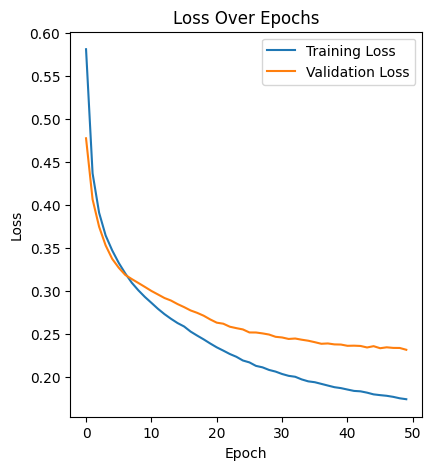

In [22]:
# Plot training history
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

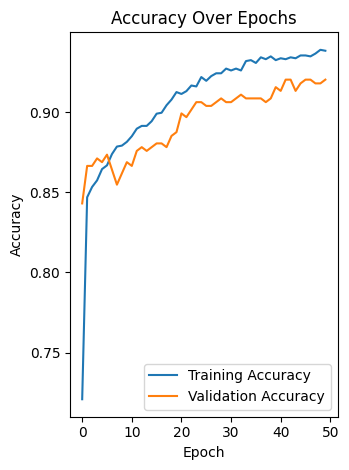

In [23]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Predict probabilities and classes
y_prob = model.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       455
           1       0.68      0.57      0.62        79

    accuracy                           0.90       534
   macro avg       0.80      0.76      0.78       534
weighted avg       0.89      0.90      0.89       534



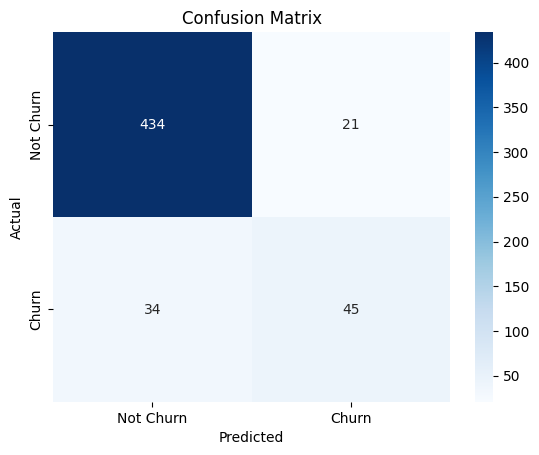

In [28]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 434 is true negative, and 21 is false positive. combine them 434+21 is 455 are total NOT CHURNERS
# 34 is false negative, and 45 is true positive. combine them 34+45 is 79 are total CHURNERS